### JanataHack: Time Series Forecasting

In [1]:
#importing Packages
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
import matplotlib.pylab as plt
from pandas import DataFrame
from io import StringIO
from datetime import date
warnings.filterwarnings("ignore")

In [2]:
#reading training file
df_train = pd.read_csv("H:/Learnings/Data Science/Hackathon/Time Series/train_6BJx641.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [4]:
df_train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [5]:
#converting the Pandas DataFrame into a time series object
df_train['datetime'] = pd.to_datetime(df_train['datetime'])  

In [6]:
#Checking if any NaN values present in dataframe
df_train.isna().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [7]:
#Replacing Var2 values with A= 1,B=2 and C=3
df_train["var2"] = df_train["var2"].apply(lambda var2: 1 if var2 == 'A' else 2 if var2 == 'B' else 3)

In [9]:
#Renaming columns to be used in prophet
df_train = df_train.rename(columns={"electricity_consumption": "y","datetime":"ds"})

In [10]:
df_train

,ID,ds,temperature,var1,pressure,windspeed,var2,y
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,1,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,1,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,1,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,1,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,1,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,1,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,1,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,1,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,1,210.0


In [11]:
#Creating Prophet Object
t_1 = Prophet(interval_width=0.95,daily_seasonality=True)

In [12]:
t_1.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [13]:
# forecasting period for next 36 months
forecast_periods = t_1.make_future_dataframe(periods = 36, include_history= True, freq="H")

In [14]:
# Prediction for forecasting periods
forecast = t_1.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()

,ds,yhat
0,2013-07-01 00:00:00,221.998965
1,2013-07-01 01:00:00,222.458653
2,2013-07-01 02:00:00,221.887121
3,2013-07-01 03:00:00,219.568939
4,2013-07-01 04:00:00,215.767361


In [16]:
forecast1.shape

(26532, 2)

In [17]:
forecast1.tail()

,ds,yhat
26527,2017-06-25 07:00:00,270.166959
26528,2017-06-25 08:00:00,269.874484
26529,2017-06-25 09:00:00,269.078075
26530,2017-06-25 10:00:00,267.248620
26531,2017-06-25 11:00:00,264.985673


In [18]:
final_t_1 = pd.merge(forecast1,df_train,on='ds',how='inner')
final_t_1.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,221.998965,0,-11.4,-17.1,1003.0,571.910,1,216.0
1,2013-07-01 01:00:00,222.458653,1,-12.1,-19.3,996.0,575.040,1,210.0
2,2013-07-01 02:00:00,221.887121,2,-12.9,-20.0,1000.0,578.435,1,225.0
3,2013-07-01 03:00:00,219.568939,3,-11.4,-17.1,995.0,582.580,1,216.0
4,2013-07-01 04:00:00,215.767361,4,-11.4,-19.3,1005.0,586.600,1,222.0


In [19]:
final_t_1.shape

(26496, 9)

In [20]:
from math import sqrt
rmse = sqrt(metrics.mean_squared_error(final_t_1.yhat,final_t_1.y))
print(rmse)

102.95070892748986


In [21]:
#Creating 2nd prophet object
t_2 = Prophet(interval_width=0.95,daily_seasonality=True)

In [22]:
# Adding extra regressors
t_2.add_regressor('temperature', prior_scale=0.5, mode='multiplicative')
t_2.add_regressor('var1', prior_scale=0.5, mode='multiplicative')
t_2.add_regressor('pressure', prior_scale=0.5, mode='multiplicative')
t_2.add_regressor('windspeed', prior_scale=0.5, mode='multiplicative')
t_2.add_regressor('var2', prior_scale=0.5, mode='multiplicative')

In [23]:
t_2.fit(df_train)

In [24]:
# forecasting period for next 36 months
forecast_periods = t_2.make_future_dataframe(periods = 36, include_history= True, freq="H")

In [25]:
forecast_periods = pd.merge(df_train,forecast_periods,on='ds',how='inner')

In [26]:
forecast_periods

,ID,ds,temperature,var1,pressure,windspeed,var2,y
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,1,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,1,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,1,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,1,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,1,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,1,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,1,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,1,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,1,210.0


In [27]:
forecast = t_2.predict(forecast_periods)

In [28]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-07-01 00:00:00,272.679197,16.259255,320.465611,272.679197,272.679197,180.290812,180.290812,180.290812,8.422851,...,-0.146487,-0.146487,-0.146487,-0.343240,-0.343240,-0.343240,172.014447,172.014447,172.014447,167.555909
1,2013-07-01 01:00:00,272.692857,-15.828909,300.835155,272.692857,272.692857,178.918326,178.918326,178.918326,6.538424,...,0.143996,0.143996,0.143996,-0.345200,-0.345200,-0.345200,172.235906,172.235906,172.235906,141.212338
2,2013-07-01 02:00:00,272.706516,-29.630042,286.438888,272.706516,272.706516,177.179329,177.179329,177.179329,4.276093,...,0.445388,0.445388,0.445388,-0.347327,-0.347327,-0.347327,172.457848,172.457848,172.457848,128.397708
3,2013-07-01 03:00:00,272.720176,3.550014,324.409091,272.720176,272.720176,174.948560,174.948560,174.948560,1.514183,...,0.754111,0.754111,0.754111,-0.349924,-0.349924,-0.349924,172.680266,172.680266,172.680266,164.334235
4,2013-07-01 04:00:00,272.733835,-38.318557,274.084652,272.733835,272.733835,171.912284,171.912284,171.912284,-2.057399,...,1.066530,1.066530,1.066530,-0.352442,-0.352442,-0.352442,172.903152,172.903152,172.903152,127.359516


In [29]:
forecast2 = forecast.loc[:,['ds','yhat']]

In [30]:
forecast2

,ds,yhat
0,2013-07-01 00:00:00,167.555909
1,2013-07-01 01:00:00,141.212338
2,2013-07-01 02:00:00,128.397708
3,2013-07-01 03:00:00,164.334235
4,2013-07-01 04:00:00,127.359516
...,...,...
26491,2017-06-23 19:00:00,257.388115
26492,2017-06-23 20:00:00,316.784632
26493,2017-06-23 21:00:00,301.779229
26494,2017-06-23 22:00:00,326.050385


In [31]:
final_t_2 = pd.merge(forecast2,df_train,on='ds',how='inner')
final_t_2.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,167.555909,0,-11.4,-17.1,1003.0,571.910,1,216.0
1,2013-07-01 01:00:00,141.212338,1,-12.1,-19.3,996.0,575.040,1,210.0
2,2013-07-01 02:00:00,128.397708,2,-12.9,-20.0,1000.0,578.435,1,225.0
3,2013-07-01 03:00:00,164.334235,3,-11.4,-17.1,995.0,582.580,1,216.0
4,2013-07-01 04:00:00,127.359516,4,-11.4,-19.3,1005.0,586.600,1,222.0


In [32]:
final_t_2.shape

(26496, 9)

In [33]:
rmse = sqrt(metrics.mean_squared_error(final_t_2.yhat,final_t_2.y))
print(rmse)

82.293760276139


In [34]:
# Taking log transformation of target variable
df_train.y = np.log(df_train.y)
df_train.head(5)

,ID,ds,temperature,var1,pressure,windspeed,var2,y
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,1,5.375278
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,1,5.347108
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,1,5.416100
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,1,5.375278
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,1,5.402677


In [35]:
t_3 = Prophet(interval_width=0.95,daily_seasonality=True)
t_3.add_regressor('temperature', prior_scale=0.5, mode='multiplicative')
t_3.add_regressor('var1', prior_scale=0.5, mode='multiplicative')
t_3.add_regressor('pressure', prior_scale=0.5, mode='multiplicative')
t_3.add_regressor('windspeed', prior_scale=0.5, mode='multiplicative')
t_3.add_regressor('var2', prior_scale=0.5, mode='multiplicative')

In [36]:
t_3.fit(df_train)
forecast_periods = t_3.make_future_dataframe(periods = 36, include_history= True, freq="H")
forecast_periods = pd.merge(df_train,forecast_periods,on='ds',how='inner')
forecast = t_3.predict(forecast_periods)

In [37]:
forecast3 = forecast.loc[:,['ds','yhat']]
final_t_3 = pd.merge(forecast3,df_train,on='ds',how='inner')
final_t_3.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,5.128782,0,-11.4,-17.1,1003.0,571.910,1,5.375278
1,2013-07-01 01:00:00,5.040568,1,-12.1,-19.3,996.0,575.040,1,5.347108
2,2013-07-01 02:00:00,4.999096,2,-12.9,-20.0,1000.0,578.435,1,5.416100
3,2013-07-01 03:00:00,5.118399,3,-11.4,-17.1,995.0,582.580,1,5.375278
4,2013-07-01 04:00:00,4.996507,4,-11.4,-19.3,1005.0,586.600,1,5.402677


In [38]:
# Scaling back the variables
final_t_3.yhat = np.e**(final_t_3.yhat)
final_t_3.y = np.e**(final_t_3.y)
final_t_3.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,168.811335,0,-11.4,-17.1,1003.0,571.910,1,216.0
1,2013-07-01 01:00:00,154.557755,1,-12.1,-19.3,996.0,575.040,1,210.0
2,2013-07-01 02:00:00,148.279008,2,-12.9,-20.0,1000.0,578.435,1,225.0
3,2013-07-01 03:00:00,167.067633,3,-11.4,-17.1,995.0,582.580,1,216.0
4,2013-07-01 04:00:00,147.895700,4,-11.4,-19.3,1005.0,586.600,1,222.0


In [39]:
rmse = sqrt(metrics.mean_squared_error(final_t_3.yhat,final_t_3.y))
print(rmse)

80.95815455862743


In [40]:
#log transformation of pressure and windspeed variable along with target variable
df_train.pressure = np.log(df_train.pressure)
df_train.windspeed = np.log(df_train.windspeed)
df_train.y = np.log(df_train.y)

In [41]:
t_4 = Prophet(interval_width=0.95,daily_seasonality=True)
t_4.add_regressor('temperature', prior_scale=0.5, mode='multiplicative')
t_4.add_regressor('var1', prior_scale=0.5, mode='multiplicative')
t_4.add_regressor('pressure', prior_scale=0.5, mode='multiplicative')
t_4.add_regressor('windspeed', prior_scale=0.5, mode='multiplicative')
t_4.add_regressor('var2', prior_scale=0.5, mode='multiplicative')

In [42]:
t_4.fit(df_train)

In [43]:
forecast_periods = t_4.make_future_dataframe(periods = 36, include_history= True, freq="H")
forecast_periods.shape

(26532, 1)

In [44]:
forecast_periods = pd.merge(df_train,forecast_periods,on='ds',how='inner')
forecast = t_4.predict(forecast_periods)

In [45]:
forecast4 = forecast.loc[:,['ds','yhat']]
final_t_4 = pd.merge(forecast4,df_train,on='ds',how='inner')
final_t_4.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,1.667824,0,-11.4,-17.1,6.910751,6.348982,1,1.681810
1,2013-07-01 01:00:00,1.652338,1,-12.1,-19.3,6.903747,6.354440,1,1.676556
2,2013-07-01 02:00:00,1.645158,2,-12.9,-20.0,6.907755,6.360326,1,1.689376
3,2013-07-01 03:00:00,1.666351,3,-11.4,-17.1,6.902743,6.367467,1,1.681810
4,2013-07-01 04:00:00,1.645949,4,-11.4,-19.3,6.912743,6.374343,1,1.686895


In [46]:
final_t_4.shape

(26496, 9)

In [47]:
forecast_periods.shape

(26496, 8)

In [50]:
# Scaling back the variables
final_t_4.yhat = np.e**(final_t_4.yhat)
final_t_4.y = np.e**(final_t_4.y)
final_t_4.pressure = np.log(final_t_4.pressure)
final_t_4.windspeed = np.log(final_t_4.windspeed)
final_t_4.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2,y
0,2013-07-01 00:00:00,200.461346,0,-11.4,-17.1,0.659114,-0.416859,1,216.0
1,2013-07-01 01:00:00,184.780837,1,-12.1,-19.3,0.658589,-0.417656,1,210.0
2,2013-07-01 02:00:00,178.008291,2,-12.9,-20.0,0.658889,-0.417200,1,225.0
3,2013-07-01 03:00:00,198.903771,3,-11.4,-17.1,0.658514,-0.417770,1,216.0
4,2013-07-01 04:00:00,178.739014,4,-11.4,-19.3,0.659263,-0.416633,1,222.0


In [51]:
rmse = sqrt(metrics.mean_squared_error(final_t_4.yhat,final_t_4.y))
print(rmse)

80.26385657163074


In [53]:
df_test = pd.read_csv("H:/Learnings/Data Science/Hackathon/Time Series//test_pavJagI.csv")

In [54]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])  #convert the Pandas DataFrame into a time series object

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           8568 non-null   int64         
 1   datetime     8568 non-null   datetime64[ns]
 2   temperature  8568 non-null   float64       
 3   var1         8568 non-null   float64       
 4   pressure     8568 non-null   float64       
 5   windspeed    8568 non-null   float64       
 6   var2         8568 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 468.7+ KB


In [56]:
df_test.isna().sum()

ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64

In [57]:
#Replacing Var2 values with A= 1,B=2 and C=3
df_test["var2"] = df_test["var2"].apply(lambda var2: 1 if var2 == 'A' else 2 if var2 == 'B' else 3)

In [58]:
df_test = df_test.rename(columns={"datetime":"ds"})

In [59]:
df_test.head()

,ID,ds,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,1
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,1
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,1
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,1
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,1


In [60]:
df_test.shape

(8568, 7)

In [61]:
df_test.pressure = np.log(df_test.pressure)
df_test.windspeed = np.log(df_test.windspeed)

In [62]:
forecast_periods = t_4.make_future_dataframe(periods = 60, include_history= True, freq="H")
forecast_periods.shape

(26556, 1)

In [63]:
forecast_periods = pd.merge(df_test,forecast_periods,on='ds',how='left')
forecast_periods.shape

(8568, 7)

In [64]:
forecast = t_4.predict(forecast_periods)

In [65]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,yhat
8563,2017-06-30 19:00:00,1.719662,1.598214,1.751121,1.71922,1.719963,0.103300,0.103300,0.103300,0.001685,...,0.000522,0.000522,0.000522,-0.011878,-0.011878,-0.011878,0.101092,0.101092,0.101092,1.677275
8564,2017-06-30 20:00:00,1.719659,1.617098,1.759952,1.71921,1.719985,0.104746,0.104746,0.104746,0.002879,...,0.000689,0.000689,0.000689,-0.011958,-0.011958,-0.011958,0.101177,0.101177,0.101177,1.690563
8565,2017-06-30 21:00:00,1.719657,1.590327,1.752457,1.71920,1.720008,0.106289,0.106289,0.106289,0.004174,...,0.000853,0.000853,0.000853,-0.012042,-0.012042,-0.012042,0.101262,0.101262,0.101262,1.673436
8566,2017-06-30 22:00:00,1.719654,1.592902,1.749890,1.71919,1.720029,0.107215,0.107215,0.107215,0.004856,...,0.001013,0.001013,0.001013,-0.012089,-0.012089,-0.012089,0.101347,0.101347,0.101347,1.673169
8567,2017-06-30 23:00:00,1.719652,1.613290,1.770111,1.71918,1.720030,0.107204,0.107204,0.107204,0.004607,...,0.001166,0.001166,0.001166,-0.012135,-0.012135,-0.012135,0.101432,0.101432,0.101432,1.696322


In [66]:
forecast5 = forecast.loc[:,['ds','yhat']]
final_t_5 = pd.merge(forecast5,df_test,on='ds',how='inner')
final_t_5.head()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2
0,2013-07-24 00:00:00,1.690085,552,-10.0,-16.4,6.918695,5.573218,1
1,2013-07-24 01:00:00,1.656688,553,-10.0,-20.7,6.918695,5.587904,1
2,2013-07-24 02:00:00,1.684198,554,-10.7,-17.1,6.910751,5.596772,1
3,2013-07-24 03:00:00,1.655016,555,-13.6,-20.7,6.915723,5.609692,1
4,2013-07-24 04:00:00,1.711547,556,-10.7,-17.1,6.913737,0.568151,1


In [67]:
# Scaling back the variables
final_t_5.yhat = np.e**(final_t_5.yhat)
final_t_5.tail()

,ds,yhat,ID,temperature,var1,pressure,windspeed,var2
8563,2017-06-30 19:00:00,5.350956,35059,-5.7,-18.6,6.905753,5.453589,1
8564,2017-06-30 20:00:00,5.422535,35060,-5.7,-17.1,6.902743,5.475543,1
8565,2017-06-30 21:00:00,5.330454,35061,-7.1,-19.3,6.911747,5.498499,1
8566,2017-06-30 22:00:00,5.329028,35062,-6.4,-19.3,6.915723,5.511289,1
8567,2017-06-30 23:00:00,5.453850,35063,-5.0,-16.4,6.908755,5.523858,1


In [68]:
final_t_5.isna().sum()

ds             0
yhat           0
ID             0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64

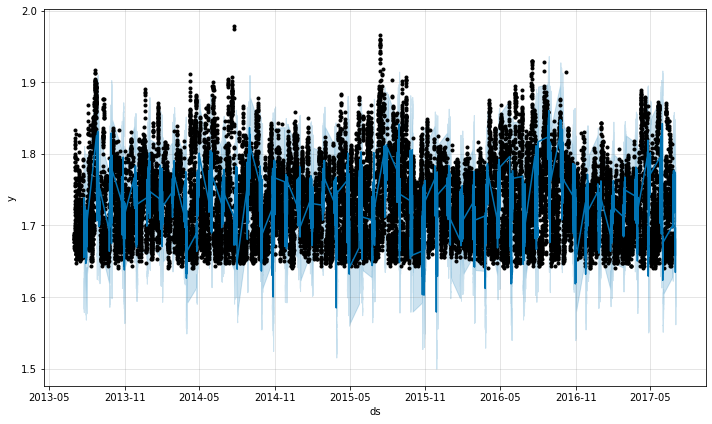

In [69]:
fig_1 = t_4.plot(forecast)

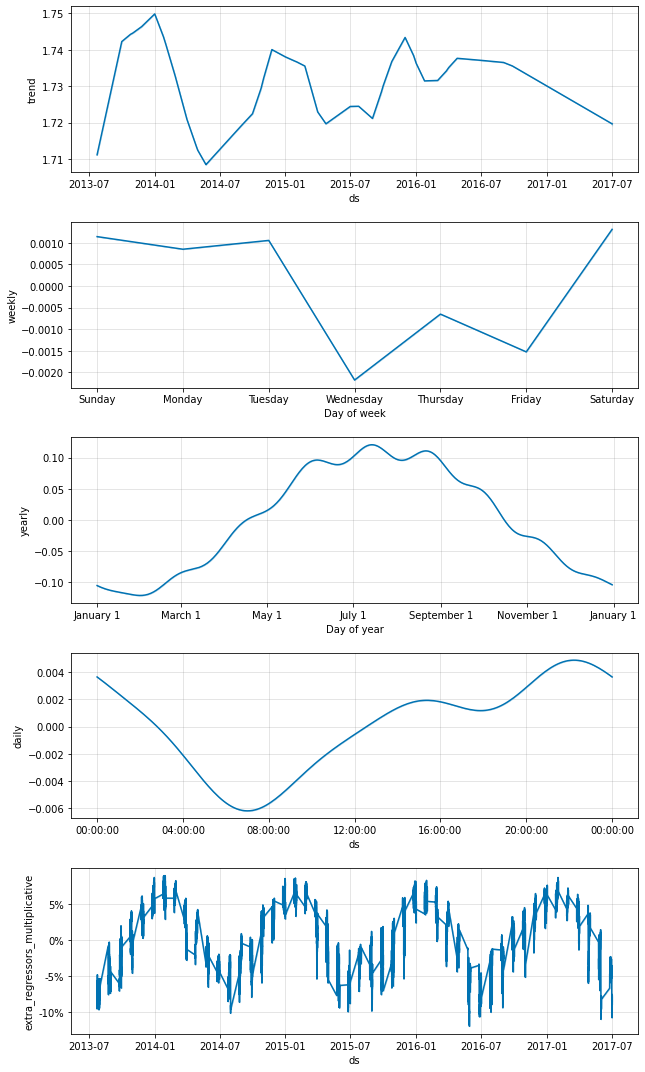

In [70]:
fig_2 = t_4.plot_components(forecast)

In [180]:
submit = final_t_5[["ID","yhat"]].copy()

In [181]:
submit = submit.rename(columns={"yhat": "electricity_consumption"})

In [182]:
submit.to_csv('H:/Learnings/Data Science/Hackathon/sample_submission.csv', index=False)